First, we need to import necessary libraries.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix

Then read the data from a file and drop NULL values.

In [12]:
data = pd.read_csv('Heart_desease.csv')
data_no_na = data.dropna()

Let's check the proportion of a target variable in the dataset to be sure we're not dealing with Rare Class Problem.

In [13]:
data_no_na['TenYearCHD'].value_counts()

TenYearCHD
0    3099
1     557
Name: count, dtype: int64

As we can see, the proportion of a target values is about 15%. That's fine.
Next we are going to assign independent and dependent variables.

In [39]:
X = data_no_na.drop('TenYearCHD', axis=1)
y = data_no_na['TenYearCHD']

Split the data to the training and testing sets.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Initiate the model, make predictions and retrieve probabilities.

In [41]:
clf = LogisticRegression(solver='lbfgs', max_iter=2000)
y_pred = clf.fit(X_train, y_train).predict(X_test)
y_pred_probs = clf.predict_proba(X_test)[:, 1]

In [ ]:
Calculate perfomance metrics...

In [42]:
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("Precision: %s \n Recall: %s \n ROC_AUC: %s" %(prec, recall, roc_auc))
print(confusion_matrix(y_test, y_pred))

Precision: 0.8353886221931656 
 Recall: 0.8523245214220602 
 ROC_AUC: 0.7517024586819014
[[924   4]
 [158  11]]


...and plot ROC curve.

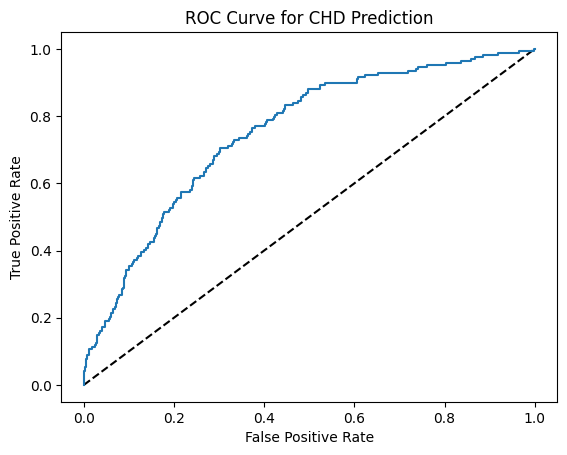

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CHD Prediction')
plt.show()

Well, 75% is not so bad. It's not a perfect model, but it is something.